<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

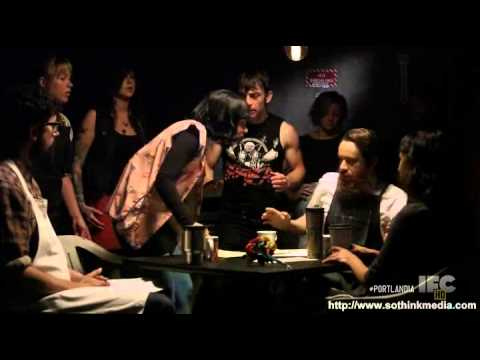

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\temsy\\Documents\\GitHub\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
# Start here 

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [5]:
shops.shape

(7616, 3)

In [6]:
#How many coffee shops are there

len(shops['coffee_shop_name'].value_counts())

79

In [7]:
#Make full_review_text all lowercase

shops['full_review_text'] = shops['full_review_text'].apply(lambda x: x.lower())
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 listed in date night: austin, ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in listed in brunch spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 very cool decor! good drinks nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in they are located within ...,4.0 star rating


In [8]:
#Create a function to keep only alphanumeric characters

import re

#Parse string into a list of tokens
def tokenize(text):
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split(' ')
    return tokens

In [9]:
#Create a new column with only tokens of the reviews

shops['tokens'] = shops['full_review_text'].apply(tokenize)
shops['tokens'].head()

0    [, 11252016, 1, checkin, love, love, loved, th...
1    [, 1222016, listed, in, date, night, austin, a...
2    [, 11302016, 1, checkin, listed, in, brunch, s...
3    [, 11252016, very, cool, decor, good, drinks, ...
4    [, 1232016, 1, checkin, they, are, located, wi...
Name: tokens, dtype: object

In [10]:
#Create a column with number of tokens per review

shops['token_len'] = shops['tokens'].map(len)
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens,token_len
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in love love loved the atm...,5.0 star rating,"[, 11252016, 1, checkin, love, love, loved, th...",101
1,The Factory - Cafe With a Soul,"12/2/2016 listed in date night: austin, ambia...",4.0 star rating,"[, 1222016, listed, in, date, night, austin, a...",52
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in listed in brunch spots ...,4.0 star rating,"[, 11302016, 1, checkin, listed, in, brunch, s...",255
3,The Factory - Cafe With a Soul,11/25/2016 very cool decor! good drinks nice ...,2.0 star rating,"[, 11252016, very, cool, decor, good, drinks, ...",74
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in they are located within ...,4.0 star rating,"[, 1232016, 1, checkin, they, are, located, wi...",119


In [11]:
#Identify if the shop is good (rating 4-5) or bad (1-3)

#Convert star_rating from a string to an integer
def numeric(text):
    '''removes all characters except numbers 1-5'''
    numbers = re.sub('[^1-5]', '', text)
    return numbers

shops['star_rating'] = shops['star_rating'].apply(numeric)
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens,token_len
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in love love loved the atm...,5,"[, 11252016, 1, checkin, love, love, loved, th...",101
1,The Factory - Cafe With a Soul,"12/2/2016 listed in date night: austin, ambia...",4,"[, 1222016, listed, in, date, night, austin, a...",52
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in listed in brunch spots ...,4,"[, 11302016, 1, checkin, listed, in, brunch, s...",255
3,The Factory - Cafe With a Soul,11/25/2016 very cool decor! good drinks nice ...,2,"[, 11252016, very, cool, decor, good, drinks, ...",74
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in they are located within ...,4,"[, 1232016, 1, checkin, they, are, located, wi...",119


In [12]:
#Convert star_rating from objects to numbers

shops['star_rating'] = shops['star_rating'].astype(int)

shops['star_rating'].dtype

dtype('int32')

In [13]:
#Create a new column that displays if the shop is good or bad

def judge(rating):
    if rating >= 4:
        return "good"
    else:
        return "bad"
    
shops['good_or_bad'] = shops['star_rating'].apply(judge)
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens,token_len,good_or_bad
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in love love loved the atm...,5,"[, 11252016, 1, checkin, love, love, loved, th...",101,good
1,The Factory - Cafe With a Soul,"12/2/2016 listed in date night: austin, ambia...",4,"[, 1222016, listed, in, date, night, austin, a...",52,good
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in listed in brunch spots ...,4,"[, 11302016, 1, checkin, listed, in, brunch, s...",255,good
3,The Factory - Cafe With a Soul,11/25/2016 very cool decor! good drinks nice ...,2,"[, 11252016, very, cool, decor, good, drinks, ...",74,bad
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in they are located within ...,4,"[, 1232016, 1, checkin, they, are, located, wi...",119,good


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [14]:
'''Import Statements'''

#Base
from collections import Counter
import re
import pandas as pd

#Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

#NLP libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load('en_core_web_md')

In [16]:
#Print out the top 10 most common words

word_counts = Counter()

good_df['tokens'].apply(lambda x: word_counts.update(x))

word_counts.most_common(10)

[('', 29499),
 ('the', 26616),
 ('and', 21311),
 ('a', 17706),
 ('i', 14952),
 ('to', 12763),
 ('of', 9932),
 ('is', 9644),
 ('coffee', 8234),
 ('in', 7517)]

In [18]:
#Use spacy to take out stop words

tokens = []

for doc in nlp.pipe(shops['full_review_text'], disable=['parser', 'tagger']):
    doc_tokens = []
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text)
    tokens.append(doc_tokens)
    
shops['spacy_tokens'] = tokens

shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens,token_len,good_or_bad,spacy_tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in love love loved the atm...,5,"[, 11252016, 1, checkin, love, love, loved, th...",101,good,"[ , 11/25/2016, 1, check, love, love, loved, a..."
1,The Factory - Cafe With a Soul,"12/2/2016 listed in date night: austin, ambia...",4,"[, 1222016, listed, in, date, night, austin, a...",52,good,"[ , 12/2/2016, listed, date, night, austin, am..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in listed in brunch spots ...,4,"[, 11302016, 1, checkin, listed, in, brunch, s...",255,good,"[ , 11/30/2016, 1, check, listed, brunch, spot..."
3,The Factory - Cafe With a Soul,11/25/2016 very cool decor! good drinks nice ...,2,"[, 11252016, very, cool, decor, good, drinks, ...",74,bad,"[ , 11/25/2016, cool, decor, good, drinks, nic..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in they are located within ...,4,"[, 1232016, 1, checkin, they, are, located, wi...",119,good,"[ , 12/3/2016, 1, check, located, northcross, ..."


In [20]:
#Display top 10 most common words

word_counts = Counter()

shops['spacy_tokens'].apply(lambda x: word_counts.update(x))

word_counts.most_common(10)

[(' ', 22606),
 ('coffee', 10539),
 ('place', 5444),
 ('good', 3986),
 ('great', 3932),
 ('check', 3357),
 ('like', 3125),
 ('austin', 2341),
 ('1', 2252),
 ('love', 1942)]

In [85]:
#Extend stop words to include ' '

STOP_WORDS = nlp.Defaults.stop_words.union([' ', '1'])

In [27]:
#Recreate spacy tokenized column

tokens = []

for doc in nlp.pipe(shops['full_review_text'], disable=['parser', 'tagger']):
    doc_tokens = []
    for token in doc:
        if (token.text not in STOP_WORDS) & (token.is_punct == False):
            doc_tokens.append(token.text)
    tokens.append(doc_tokens)
    
shops['spacy_tokens'] = tokens

shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens,token_len,good_or_bad,spacy_tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in love love loved the atm...,5,"[, 11252016, 1, checkin, love, love, loved, th...",101,good,"[11/25/2016, 1, check, love, love, loved, atmo..."
1,The Factory - Cafe With a Soul,"12/2/2016 listed in date night: austin, ambia...",4,"[, 1222016, listed, in, date, night, austin, a...",52,good,"[12/2/2016, listed, date, night, austin, ambia..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in listed in brunch spots ...,4,"[, 11302016, 1, checkin, listed, in, brunch, s...",255,good,"[11/30/2016, 1, check, listed, brunch, spots, ..."
3,The Factory - Cafe With a Soul,11/25/2016 very cool decor! good drinks nice ...,2,"[, 11252016, very, cool, decor, good, drinks, ...",74,bad,"[11/25/2016, cool, decor, good, drinks, nice, ..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in they are located within ...,4,"[, 1232016, 1, checkin, they, are, located, wi...",119,good,"[12/3/2016, 1, check, located, northcross, mal..."


In [28]:
#List top 10 most common words

word_counts = Counter()

shops['spacy_tokens'].apply(lambda x: word_counts.update(x))

word_counts.most_common(10)

[('coffee', 10539),
 ('place', 5444),
 ('good', 3986),
 ('great', 3932),
 ('check', 3357),
 ('like', 3125),
 ('austin', 2341),
 ('1', 2252),
 ('love', 1942),
 ('time', 1905)]

In [60]:
#Create a function that returns a dataframe of word count summary statistics

def count(tokens):
    
    #stores the count of each token
    word_counts = Counter()
    
    for token in tokens:
        word_counts.update(token)
        
    #build word count df
    temp = zip(word_counts.keys(), word_counts.values())
    wc = pd.DataFrame(temp, columns = ['word', 'count'])
    
    #rank the word counts
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()
    
    #calculate the percent total of each token
    wc['pct_total'] = wc['count'].apply(lambda token_count: token_count / total)
    
    return wc.sort_values(by='rank')

In [58]:
#Collect all the tokens for good shops, and another for bad shops

good_df = shops[shops['good_or_bad'] == 'good']
bad_df = shops[shops['good_or_bad'] == 'bad']

In [62]:
#Summary data on spacy tokens of good coffee shops

good_wc = count(good_df['spacy_tokens'])
good_wc.head()

,word,count,rank,pct_total
7,coffee,8375,1.0,0.028933
77,place,4328,2.0,0.014952
135,great,3466,3.0,0.011974
201,good,3106,4.0,0.010730
2,check,2852,5.0,0.009853


In [68]:
#Summary data on spacy tokens of good coffee shops

bad_wc = count(bad_df['spacy_tokens'])
bad_wc.head()

,word,count,rank,pct_total
36,coffee,2164,1.0,0.026757
38,place,1116,2.0,0.013799
33,like,886,3.0,0.010955
3,good,880,4.0,0.010881
41,check,505,5.0,0.006244


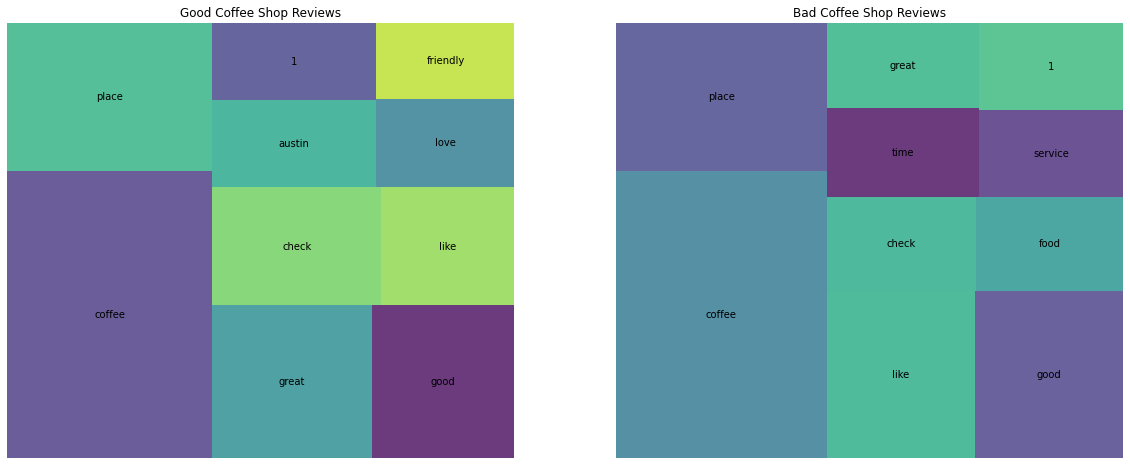

In [75]:
#Create a side by side visualization for good and bad coffee shop words

good_top10 = good_wc[good_wc['rank'] <= 10]
bad_top10 = bad_wc[bad_wc['rank'] <= 10]

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

axes[0].set_title('Good Coffee Shop Reviews')
squarify.plot(sizes=good_top10['pct_total'], label=good_top10['word'], alpha=.8, ax=axes[0])
axes[0].axis('off')

axes[1].set_title('Bad Coffee Shop Reviews')
squarify.plot(sizes=bad_top10['pct_total'], label=bad_top10['word'], alpha=.8, ax=axes[1])
axes[1].axis('off')

plt.show()

In [72]:
#Drop words that are shared between both top 10

bad_unique = bad_wc[~bad_wc['word'].isin(good_top10['word'])]
good_unique = good_wc[~good_wc['word'].isin(bad_top10['word'])]

,word,count,rank,pct_total
47,austin,2043,7.0,0.007058
3,love,1734,9.0,0.005990
162,friendly,1499,10.0,0.005179
8,shop,1405,12.0,0.004854
65,nice,1399,13.0,0.004833


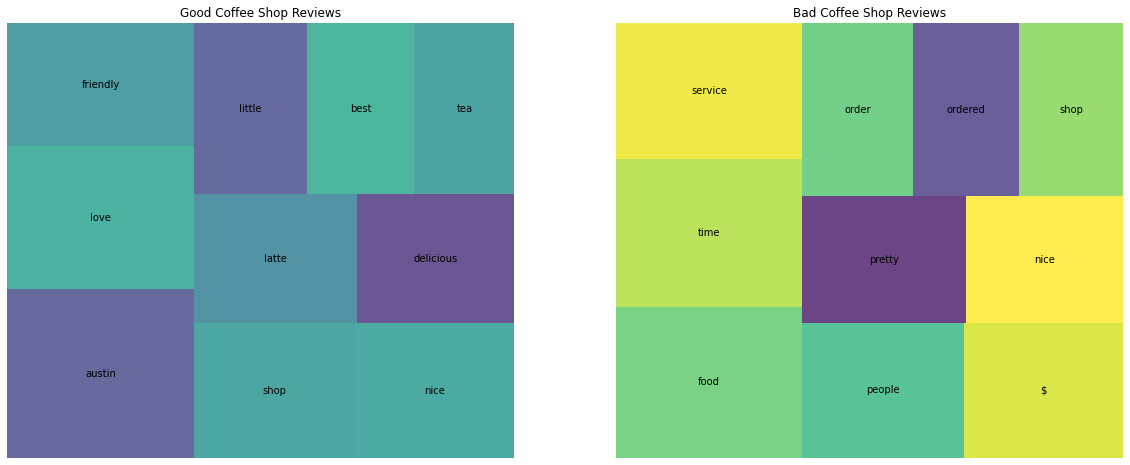

In [76]:
#Create a side by side visualization for good and bad coffee shop words
#Showing the more different words

good_top10 = good_unique.head(10)
bad_top10 = bad_unique.head(10)

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

axes[0].set_title('Good Coffee Shop Reviews')
squarify.plot(sizes=good_top10['pct_total'], label=good_top10['word'], alpha=.8, ax=axes[0])
axes[0].axis('off')

axes[1].set_title('Bad Coffee Shop Reviews')
squarify.plot(sizes=bad_top10['pct_total'], label=bad_top10['word'], alpha=.8, ax=axes[1])
axes[1].axis('off')

plt.show()

In [86]:
#Recreate spacy tokenized column with lemmatization

tokens = []

for doc in nlp.pipe(shops['full_review_text'], disable=['parser', 'tagger']):
    doc_tokens = []
    for token in doc:
        if (token.text not in STOP_WORDS) & (token.is_punct == False):
            doc_tokens.append(token.lemma_)
    tokens.append(doc_tokens)
    
shops['lemma_tokens'] = tokens

In [87]:
#Collect all the tokens for good shops, and another for bad shops

good_df = shops[shops['good_or_bad'] == 'good']
bad_df = shops[shops['good_or_bad'] == 'bad']

#Summary data on spacy tokens of good coffee shops

good_wc = count(good_df['lemma_tokens'])
bad_wc = count(bad_df['lemma_tokens'])

#Drop words that are shared between both top 10

good_top10 = good_wc[good_wc['rank'] <= 10]
bad_top10 = bad_wc[bad_wc['rank'] <= 10]

bad_unique = bad_wc[~bad_wc['word'].isin(good_top10['word'])]
good_unique = good_wc[~good_wc['word'].isin(bad_top10['word'])]

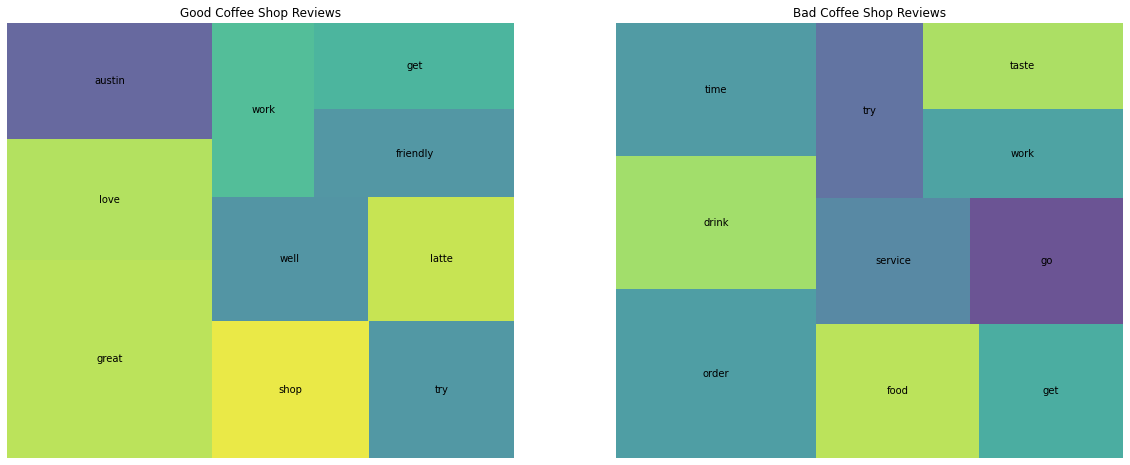

In [88]:
#Create a side by side visualization for good and bad coffee shop words
#Showing the more different words

good_top10 = good_unique.head(10)
bad_top10 = bad_unique.head(10)

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

axes[0].set_title('Good Coffee Shop Reviews')
squarify.plot(sizes=good_top10['pct_total'], label=good_top10['word'], alpha=.8, ax=axes[0])
axes[0].axis('off')

axes[1].set_title('Bad Coffee Shop Reviews')
squarify.plot(sizes=bad_top10['pct_total'], label=bad_top10['word'], alpha=.8, ax=axes[1])
axes[1].axis('off')

plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

